# 1. INSPECTING DATA

In [8]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [9]:
data1=pd.read_csv("heart.csv")
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
display(data1.describe())
display(data1.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

# 2. EDA (EXPLORATORY DATA ANALYSIS)

1    165
0    138
Name: output, dtype: int64


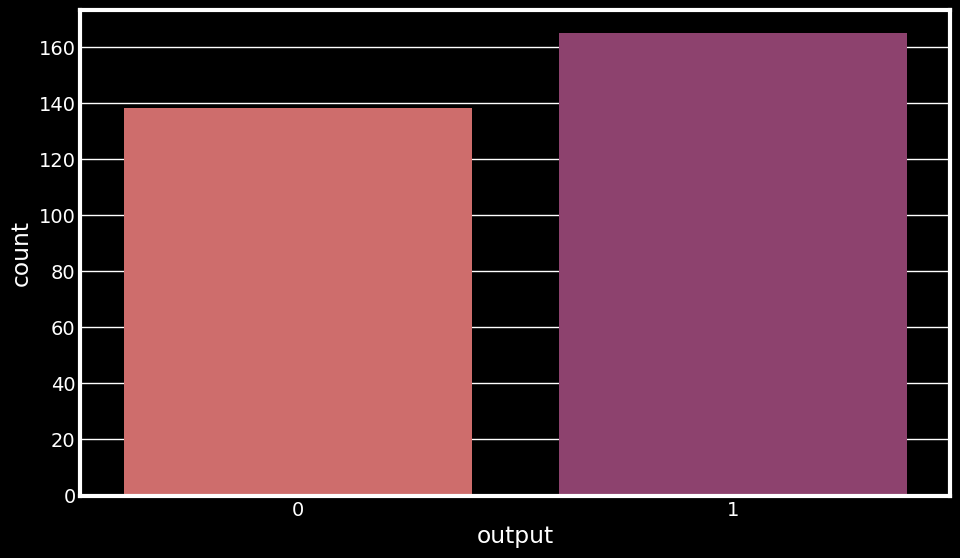

In [11]:
#Output variable
print(data1['output'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot(x="output", data=data1, palette='flare')
plt.show()

ax=px.pie(data1, names= "output" ,template= "plotly_dark",title="Output",hole=0.8)
ax.show()

In [12]:
#Classification columns
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data1[class_cols]

#Continuous columns
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

In [13]:
#Divide the data based on sex variable
X=data1[data1["sex"]==1].reset_index()  
Y=data1[data1["sex"]==0].reset_index()   
display(X.head(),Y.head())

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [14]:
ax= px.pie(data1, names= "sex",template= "plotly_dark",title= "Gender distribution",hole= 0.5)
ax.show()

In [15]:
print("Percent of '1' at high risk of heart attack = {} %" .format(round((len(X[X["output"]==1])/len(X)*100),2)))
print("'1' average high-risk age = {} yrs\n" .format(round(X[X["output"]==1]["age"].mean())))

print("Percent of '0' at high risk of heart attack = {} %" .format(round((len(Y[Y["output"]==1])/len(Y)*100),2)))
print("Average high-risk age = {} yrs" .format(round(Y[Y["output"]==1]["age"].mean())))

Percent of '1' at high risk of heart attack = 44.93 %
'1' average high-risk age = 51 yrs

Percent of '0' at high risk of heart attack = 75.0 %
Average high-risk age = 55 yrs


Female Value Counts: 
0    114
1     93
Name: output, dtype: int64
Male Value Counts: 
1    72
0    24
Name: output, dtype: int64


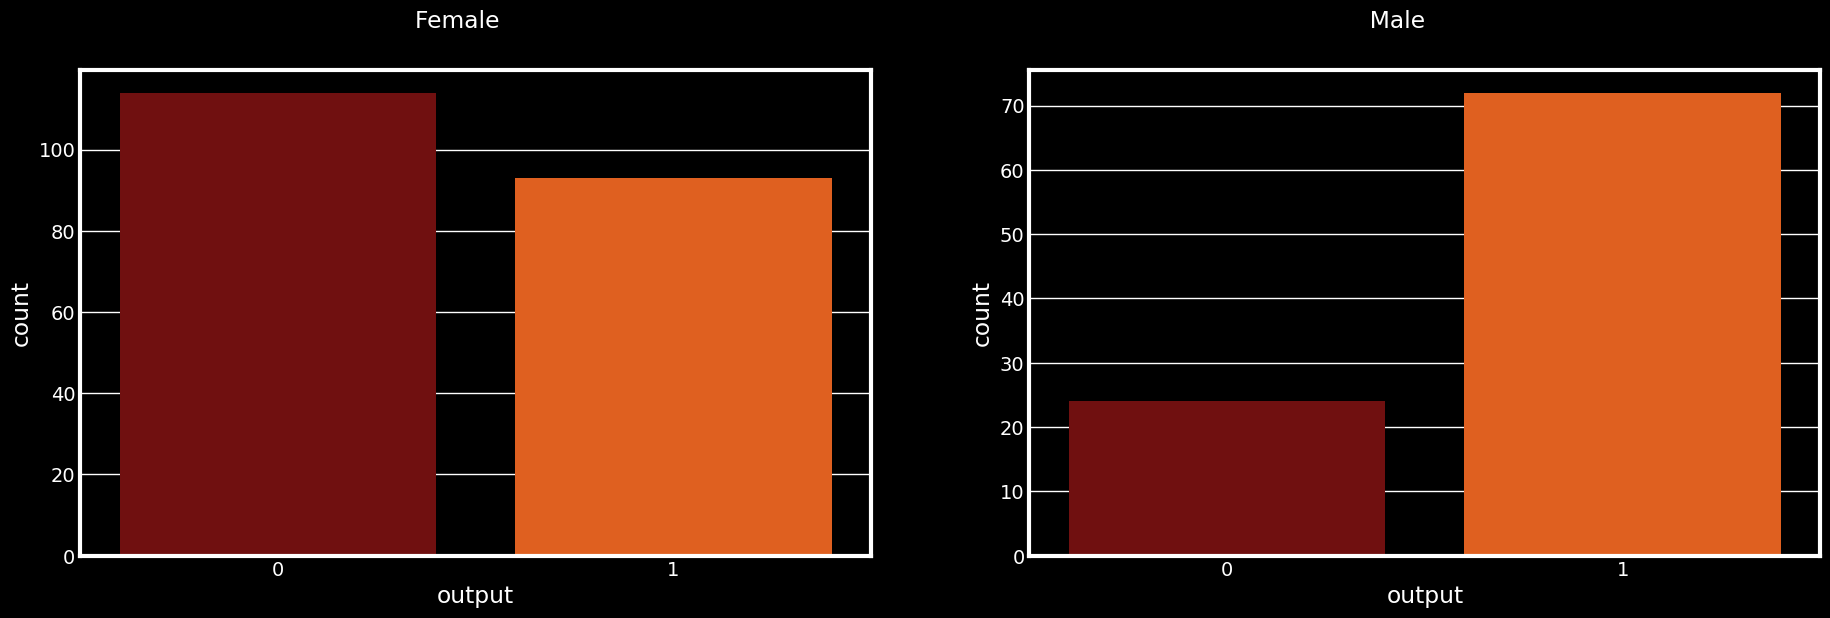

In [16]:
print("Female Value Counts: \n{}".format(X['output'].value_counts()))
print("Male Value Counts: \n{}".format(Y['output'].value_counts()))

fig, ax1 = plt.subplots(1,2, figsize=(20,6))
plt.suptitle("Female                                                                                                                      Male")
sns.countplot(x="output", data=X, palette='gist_heat',ax=ax1[0])
sns.countplot(x="output", data=Y, palette='gist_heat',ax=ax1[1])
fig.show()

In [17]:
fig=go.Figure()
fig.add_trace(go.Box(y=Y["age"],name="Male",marker_color="blue",boxpoints="all",whiskerwidth=0.3))
fig.add_trace(go.Box(y=X["age"],name="Female",marker_color="#e75480",boxpoints="all",whiskerwidth=0.3))
fig.update_layout(template="plotly_dark",title="Age Distribution",height=600)
fig.show()

In [18]:
class_cols=["output",'cp',"fbs","exng","restecg","thall","caa","slp"]
for col in class_cols:
    ax= px.sunburst(data1, names= col,path= ["sex",col],template= "plotly_dark", title= "{} => Based on Sex".format(col))
    ax.show()

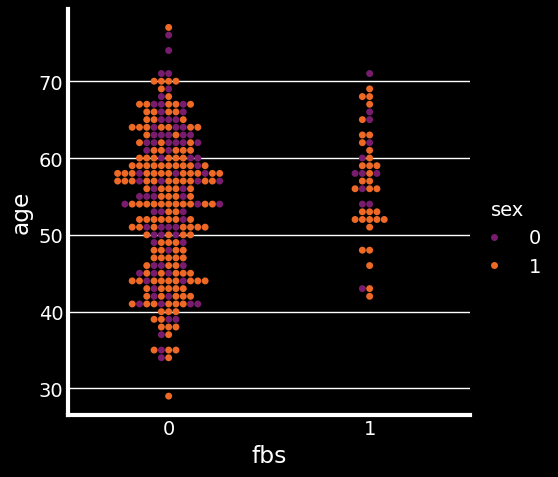

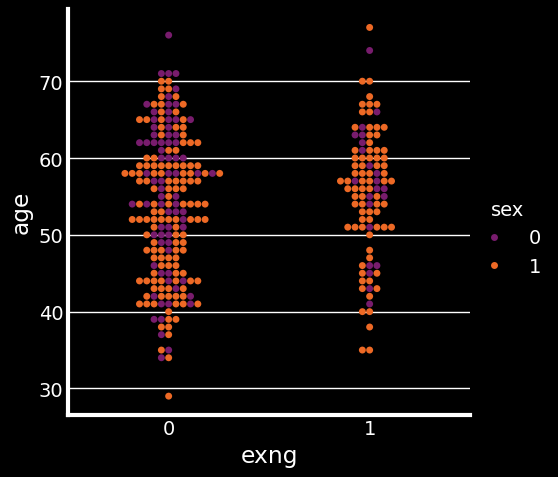

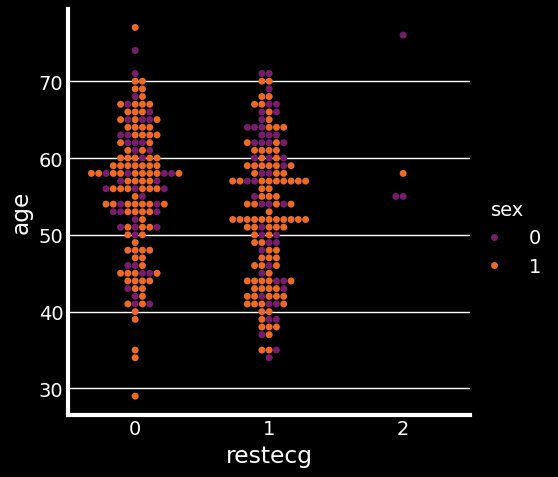

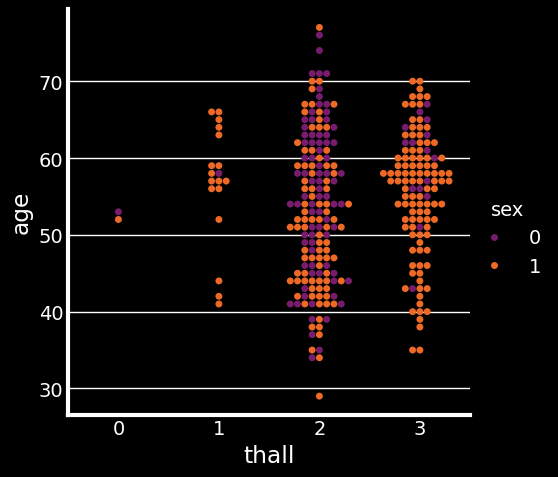

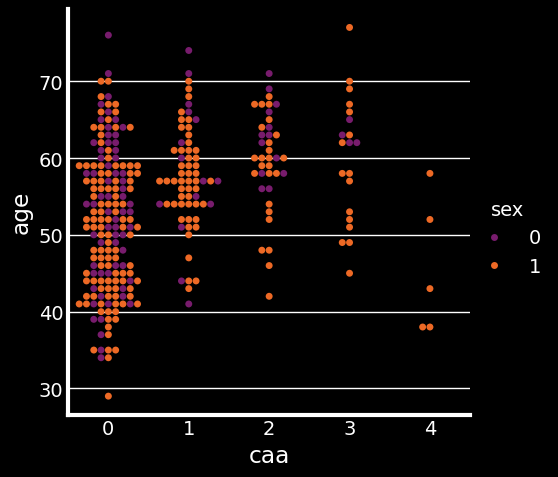

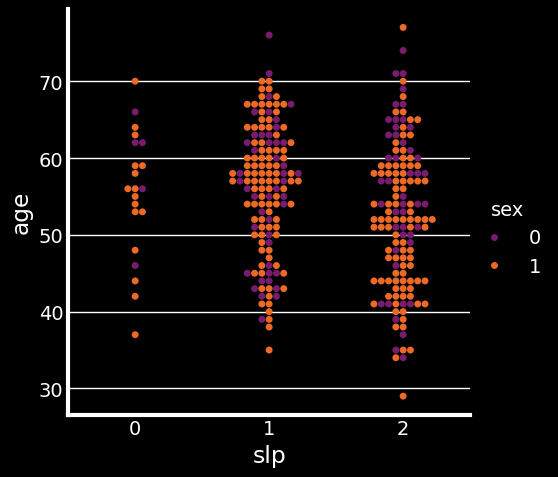

In [19]:
#Pie plots 
for col in class_cols[2:]:
    ax=px.pie(data1, names= col ,template= "plotly_dark",title=col,hole=0.7)
    ax.show()
    
#Swarm Plots
for col in class_cols[2:]:
    sns.catplot(kind="swarm", data=data1, x=col, y="age", palette="inferno", hue="sex")
plt.show()
    
# fig, ax1 = plt.subplots(4,2, figsize=(15,22.5))
# k = 0
# for i in range(4):
#     for j in range(2):
#         sns.boxplot(data=data1,x=class_cols[k],y="age",palette="autumn",hue="sex",saturation=1,ax=ax1[i][j])
#         k+=1
# plt.tight_layout()
# plt.show()

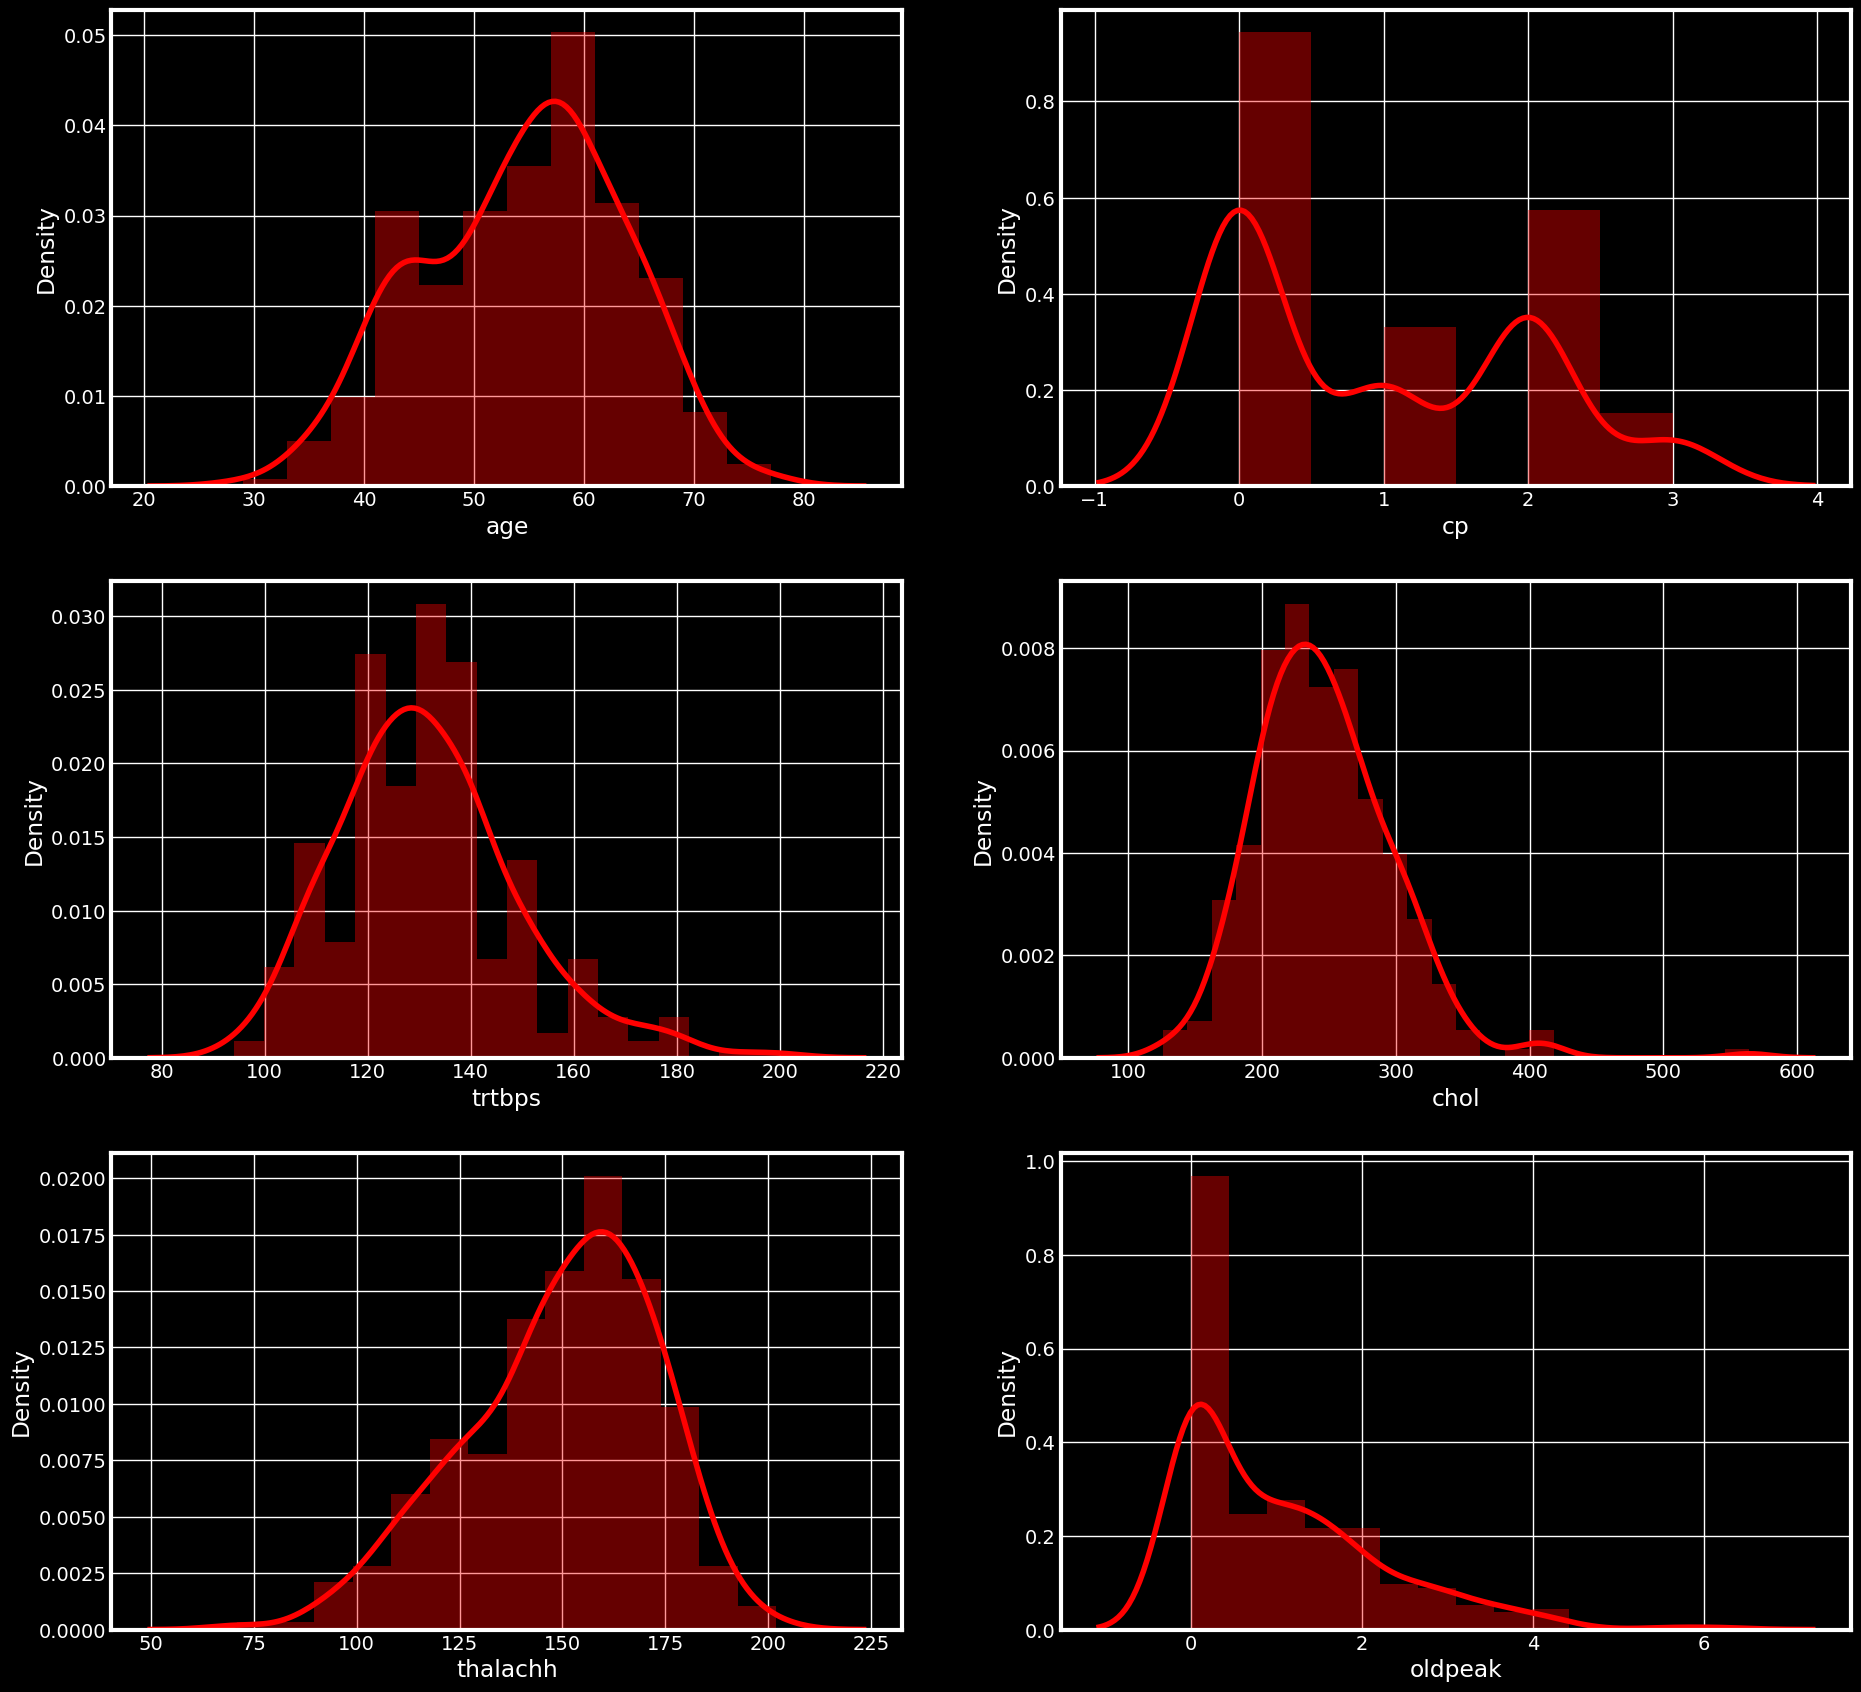

In [20]:
columns=["age","cp","trtbps","chol","thalachh","oldpeak"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
    for j in range(2):
            sns.distplot(data1[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

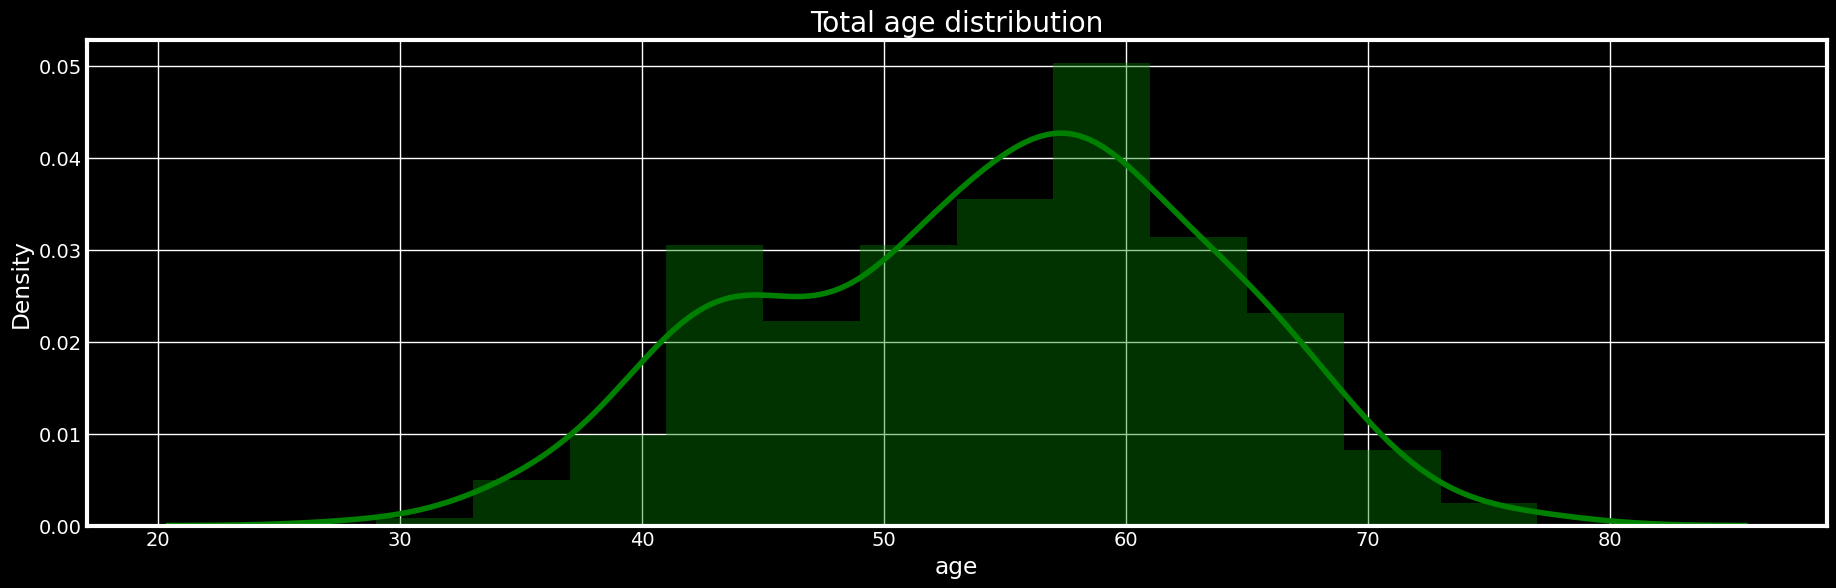

In [21]:
#Distribution plots
plt.figure(figsize=(20,6))
sns.distplot(data1["age"],color="green",bins="auto")
plt.title("Total age distribution")
plt.show()

ax= px.histogram(data1,x= "age", template= "plotly_dark",color= "output",title='Output 0 or 1')
ax.show()

ax= px.histogram(data1,x= "age", template= "plotly_dark",color= "sex",title='Male vs Female age distribution')
ax.show()

In [22]:
X=data1[data1["sex"]==1].reset_index()  #Females
Y=data1[data1["sex"]==0].reset_index()   #Males

HR=data1[data1["output"]==1].reset_index()  #High Risk
LR=data1[data1["output"]==0].reset_index()  #Low Risk

#Calculate general characteristics
print("----------------General Data------------------")
print("Total Age =>")
print("Mean: {}".format(round(data1["age"].mean())))
print("Median: {}".format(round(data1["age"].median())))
print("Variance: {}".format(round(data1["age"].var())))
print("Standard Deviation: {}\n".format(round((data1["age"].std()),3)))

# Calculate gender specific characteristics
print("--------------Gender Specific Data-------------------")
print("For MEN =>")
print("Mean: {}".format(round(Y["age"].mean())))
print("Median: {}".format(round(Y["age"].median())))
print("Variance: {}".format(round(Y["age"].var())))
print("Standard Deviation: {}\n\n".format(round((Y["age"].std()),3)))

print("For WOMEN =>")
print("Mean: {}".format(round(X["age"].mean())))
print("Median: {}".format(round(X["age"].median())))
print("Variance: {}".format(round(X["age"].var())))
print("Standard Deviation: {}\n".format(round((X["age"].std()),3)))

# Calculate output specific characteristics
print("------------------Output Specific Data-----------------------")
print("For High Risk =>")
print("Mean: {}".format(round(HR["age"].mean())))
print("Median: {}".format(round(HR["age"].median())))
print("Variance: {}".format(round(HR["age"].var())))
print("Standard Deviation: {}\n\n".format(round((HR["age"].std()),3)))

print("For Low Risk =>")
print("Mean: {}".format(round(LR["age"].mean())))
print("Median: {}".format(round(LR["age"].median())))
print("Variance: {}".format(round(LR["age"].var())))
print("Standard Deviation: {}".format(round((LR["age"].std()),3)))

----------------General Data------------------
Total Age =>
Mean: 54
Median: 55
Variance: 82
Standard Deviation: 9.082

--------------Gender Specific Data-------------------
For MEN =>
Mean: 56
Median: 57
Variance: 89
Standard Deviation: 9.409


For WOMEN =>
Mean: 54
Median: 54
Variance: 79
Standard Deviation: 8.884

------------------Output Specific Data-----------------------
For High Risk =>
Mean: 52
Median: 52
Variance: 91
Standard Deviation: 9.551


For Low Risk =>
Mean: 57
Median: 58
Variance: 63
Standard Deviation: 7.962


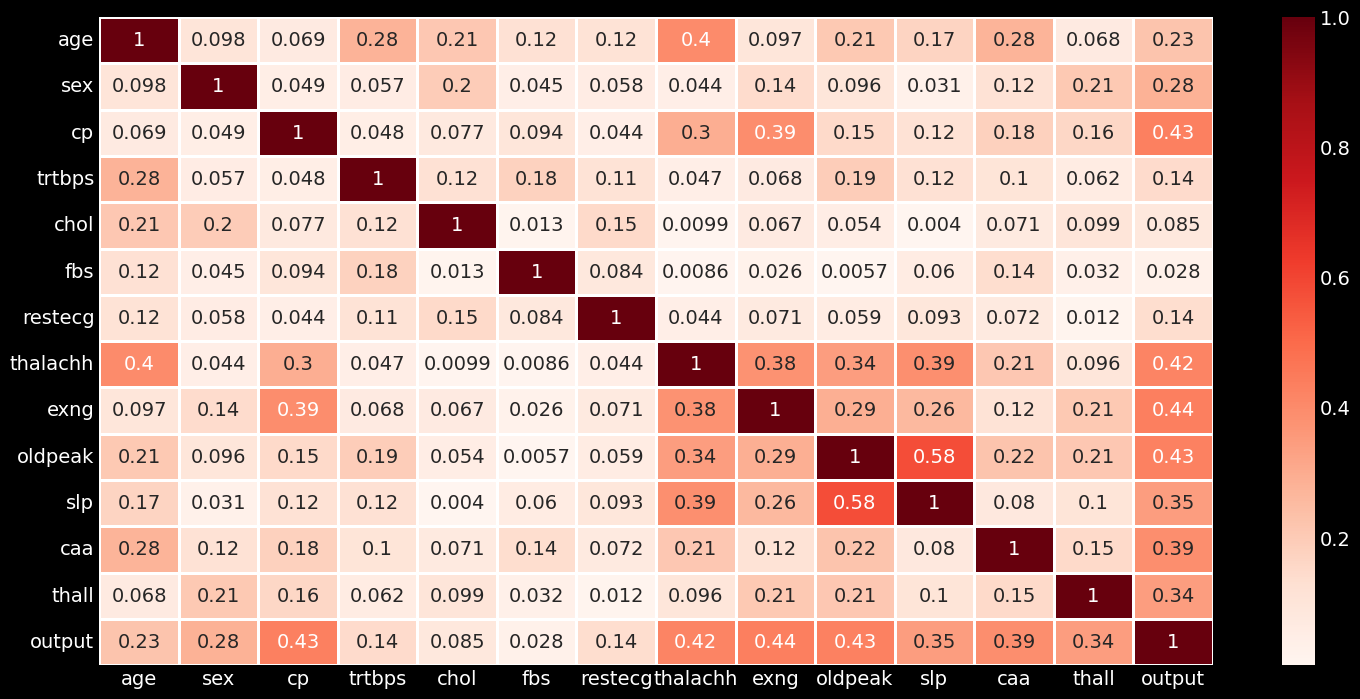

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


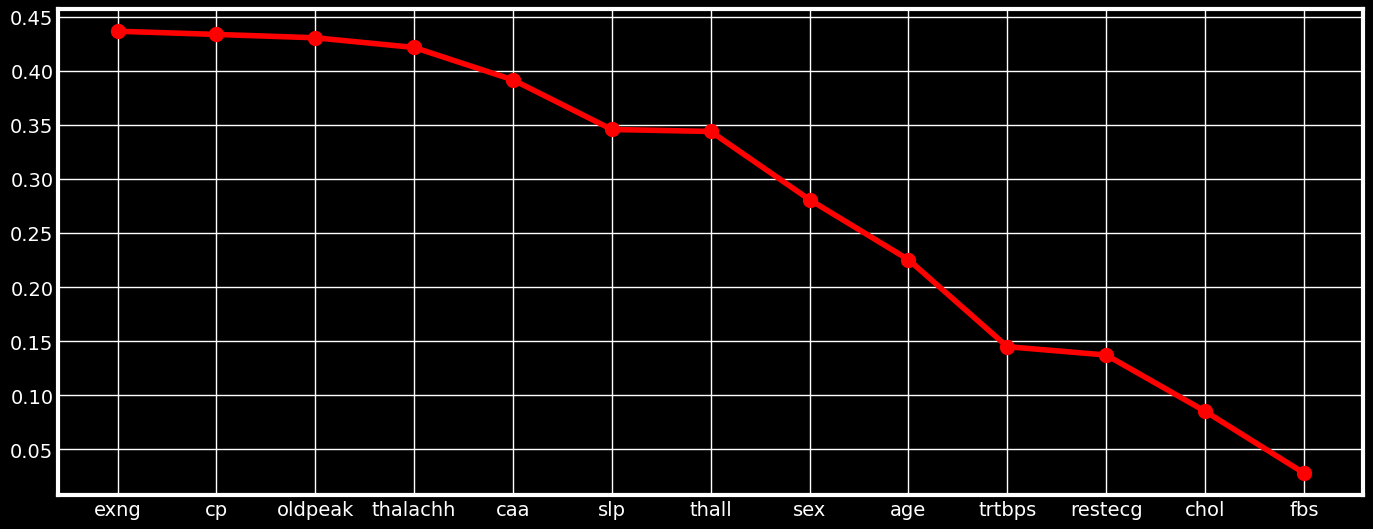

In [23]:
new_df=data1
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

In [24]:
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.29%
Column chol outliers = 5 => 1.65%
Column thalachh outliers = 1 => 0.33%
Column oldpeak outliers = 8 => 2.64%


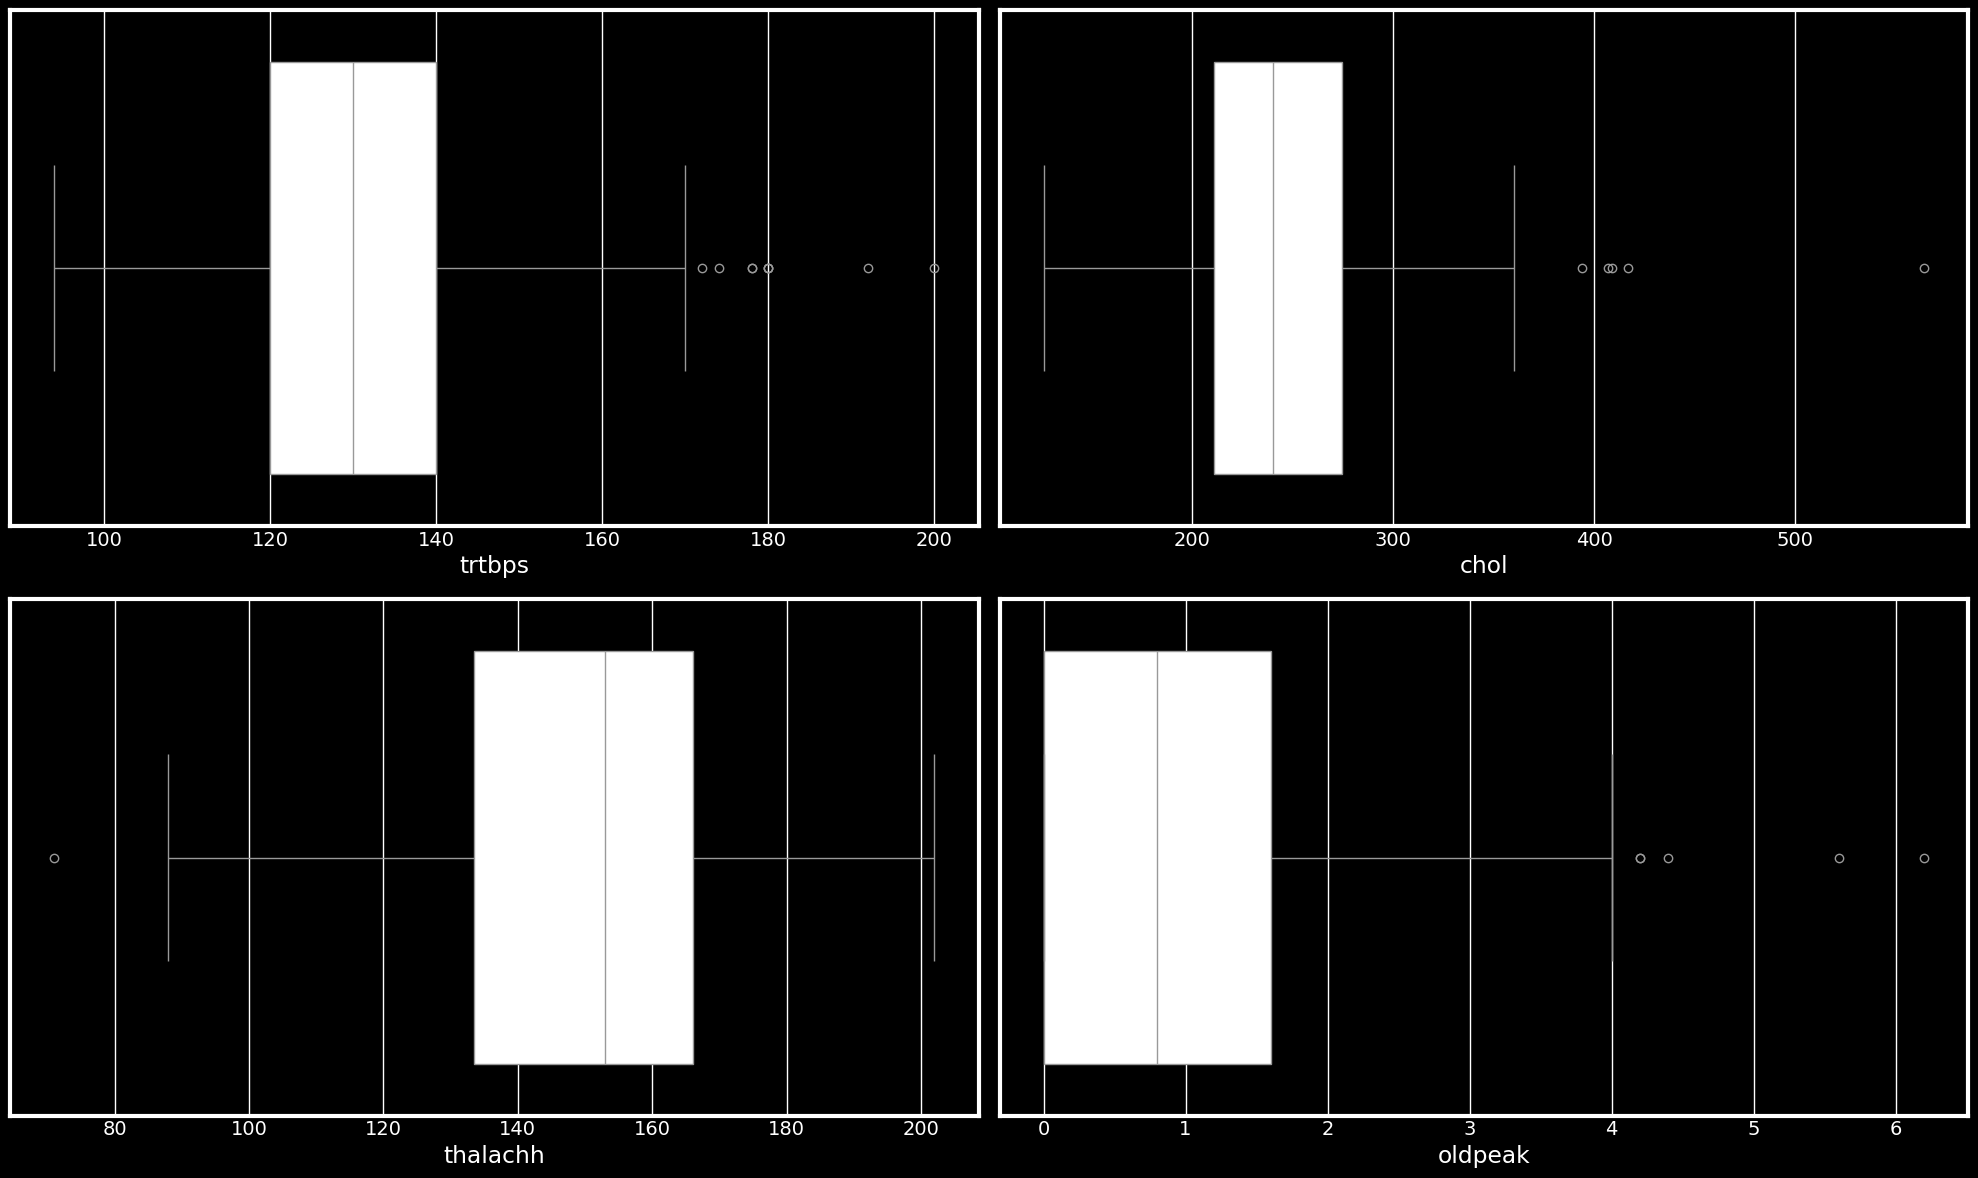

Outliners Present at position: 

trtbps: (array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292],
      dtype=int64),)
chol: (array([ 28,  85,  96, 220, 246], dtype=int64),)
thalachh: (array([272], dtype=int64),)
oldpeak: (array([101, 204, 221, 250, 291], dtype=int64),)


In [25]:
fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=data1,x=data1[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

#Display the position of outliners.
print("Outliners Present at position: \n")
print("trtbps: {}".format(np.where(data1['trtbps']>165)))
print("chol: {}".format(np.where(data1['chol']>360)))
print("thalachh: {}".format(np.where(data1['thalachh']<80)))
print("oldpeak: {}".format(np.where(data1['oldpeak']>4)))

In [26]:
#Using log transformation
data1["age"]= np.log(data1.age)
data1["trtbps"]= np.log(data1.trtbps)
data1["chol"]= np.log(data1.chol)
data1["thalachh"]= np.log(data1.thalachh)
print("---Log Transform performed---")

#Outliners again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 1 => 0.33%
Column trtbps outliers = 9 => 2.97%
Column chol outliers = 6 => 1.98%
Column thalachh outliers = 6 => 1.98%
Column oldpeak outliers = 8 => 2.64%


# 3. BUILDING MODEL

In [27]:
#Data Splitting
X=data1.iloc[:,:13]
Y=data1["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [28]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

## A. Decision Tree

Execution time of model: 0.01507 seconds


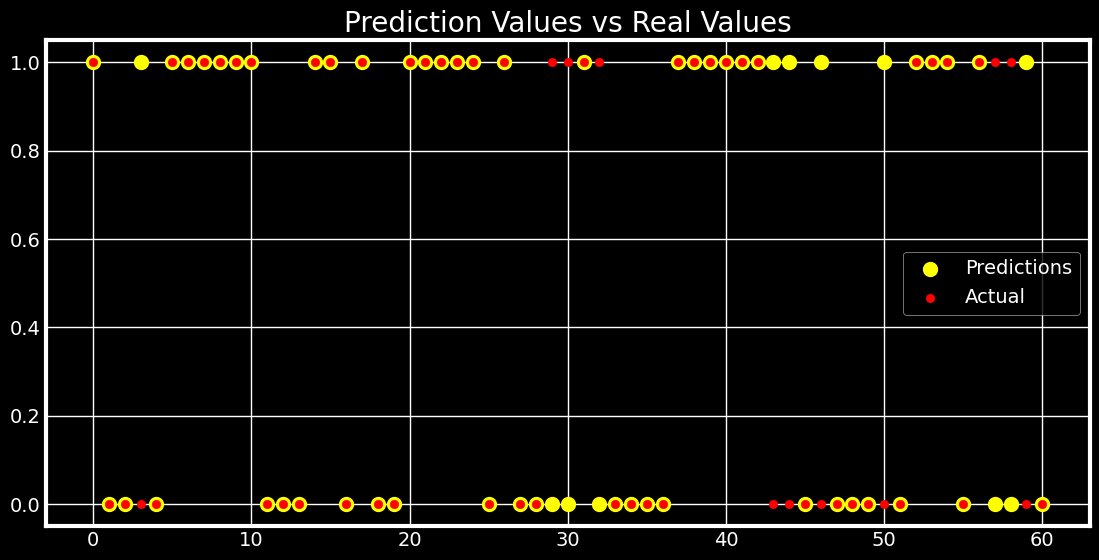

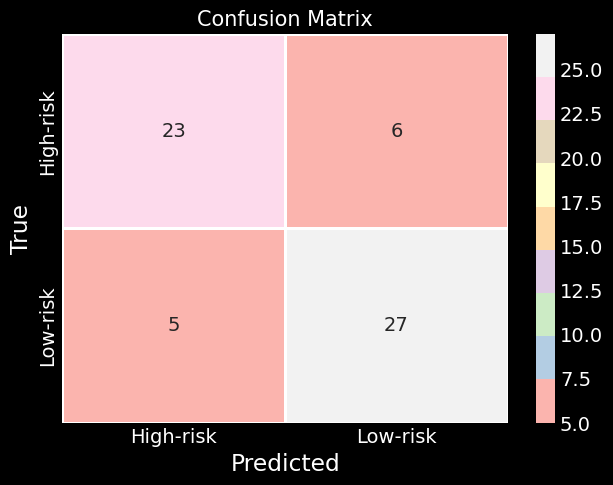

Precision: 0.818 
Recall: 0.844 
F1-Score: 0.831 
Accuracy: 81.967 %
Mean Square Error: 0.18


In [29]:
#Build Model
start=time.time()

model_tree=DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=100)
model_tree.fit(X_train,Y_train)
Y_pred=model_tree.predict(X_test)

end=time.time()

model_tree_time=end-start
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_tree_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## B. Random Forest

Execution time of model: 0.33625 seconds


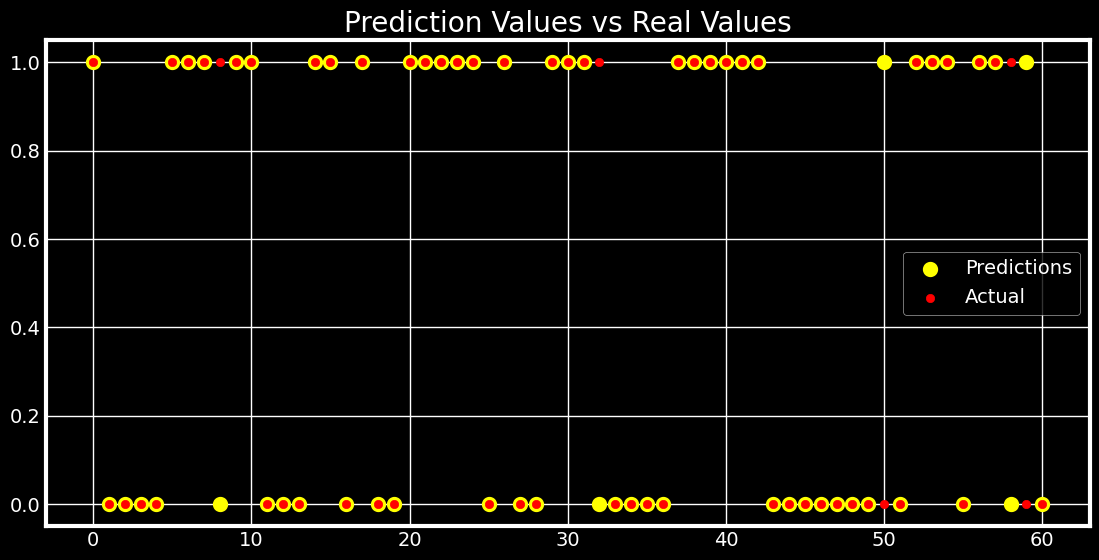

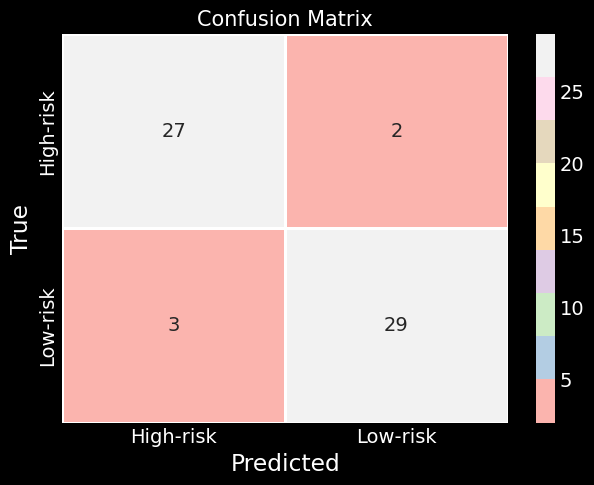

Precision: 0.935 
Recall: 0.906 
F1-Score: 0.921 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [30]:
#Build Model
start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)
Y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## C. Support Vector Machine

Execution time of model: 0.00936 seconds


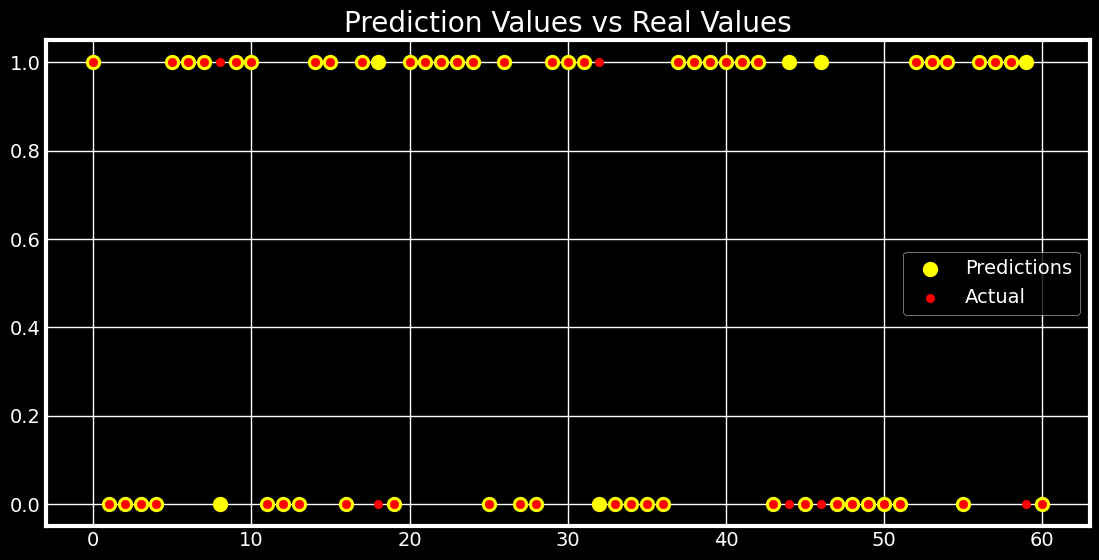

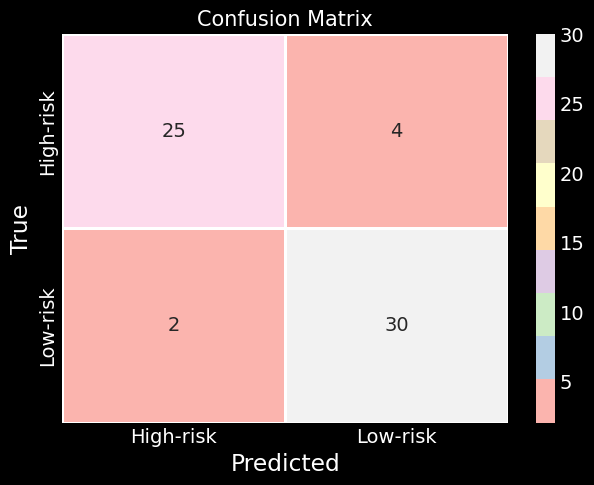

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [31]:
#Build Model
start=time.time()

model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

end=time.time()

model_svm_time=end-start
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## D. Gradient Boosting

Execution time of model: 0.02806 seconds


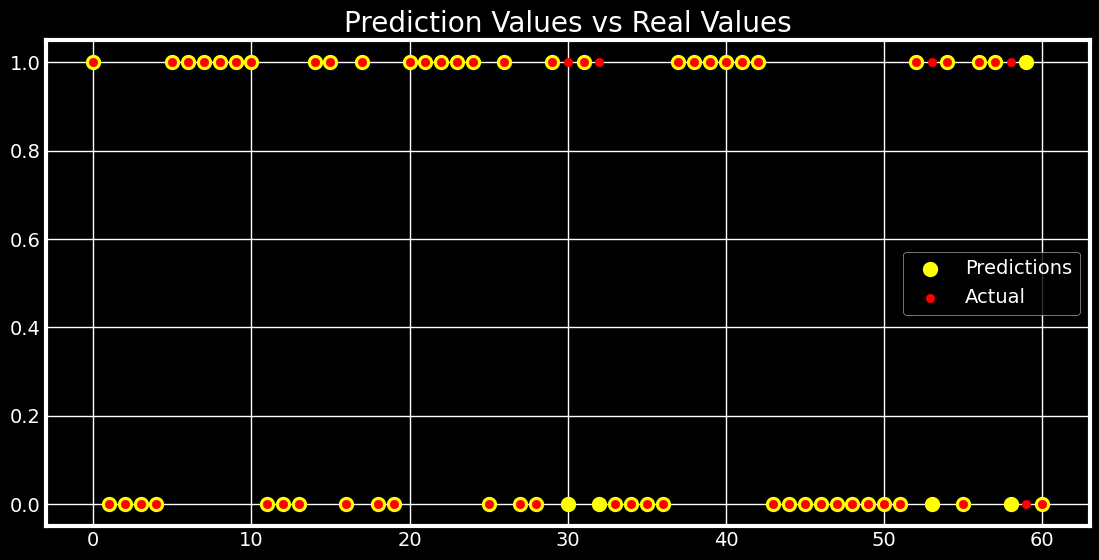

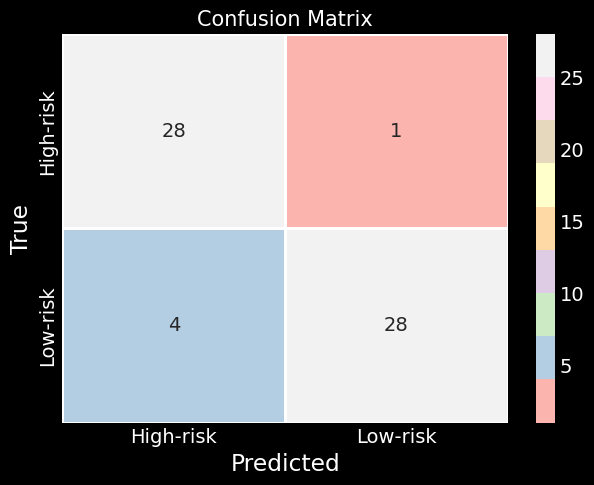

Precision: 0.966 
Recall: 0.875 
F1-Score: 0.918 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [32]:
#Build Model
start=time.time()

model_GB = GradientBoostingClassifier(random_state=10, n_estimators=20, learning_rate=0.29, loss='log_loss')
model_GB.fit(X_train,Y_train)
Y_pred= model_GB.predict(X_test)

end=time.time()

model_GB_time=end-start
model_GB_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_GB_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 4. COMPARE MODEL

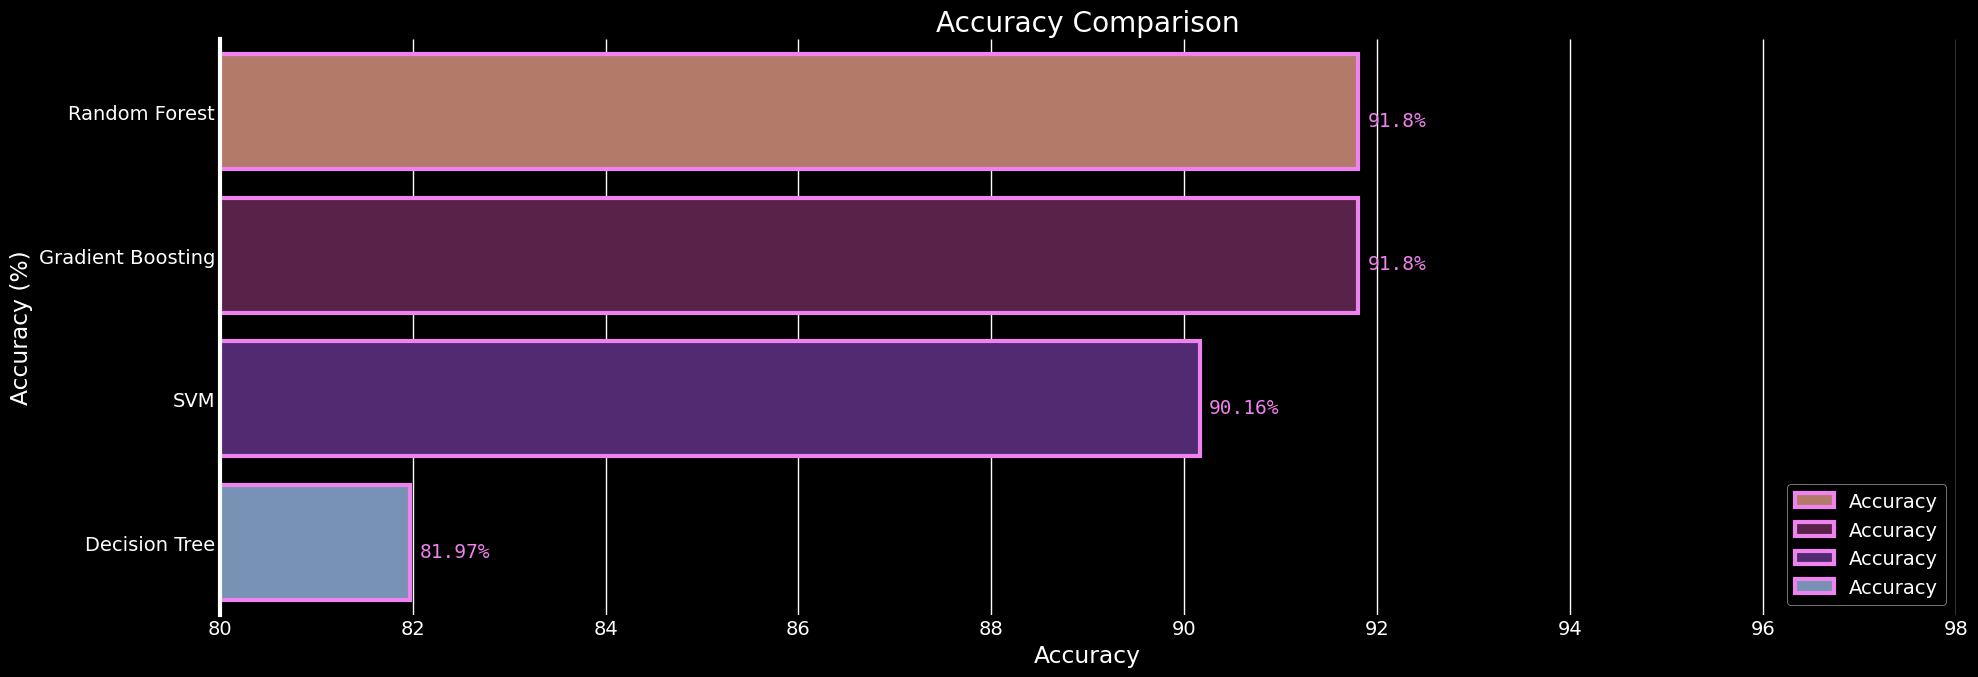

In [33]:
accuracies={"Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
            "SVM": model_svm_accuracy,
            "Gradient Boosting": model_GB_accuracy,}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(80,98)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

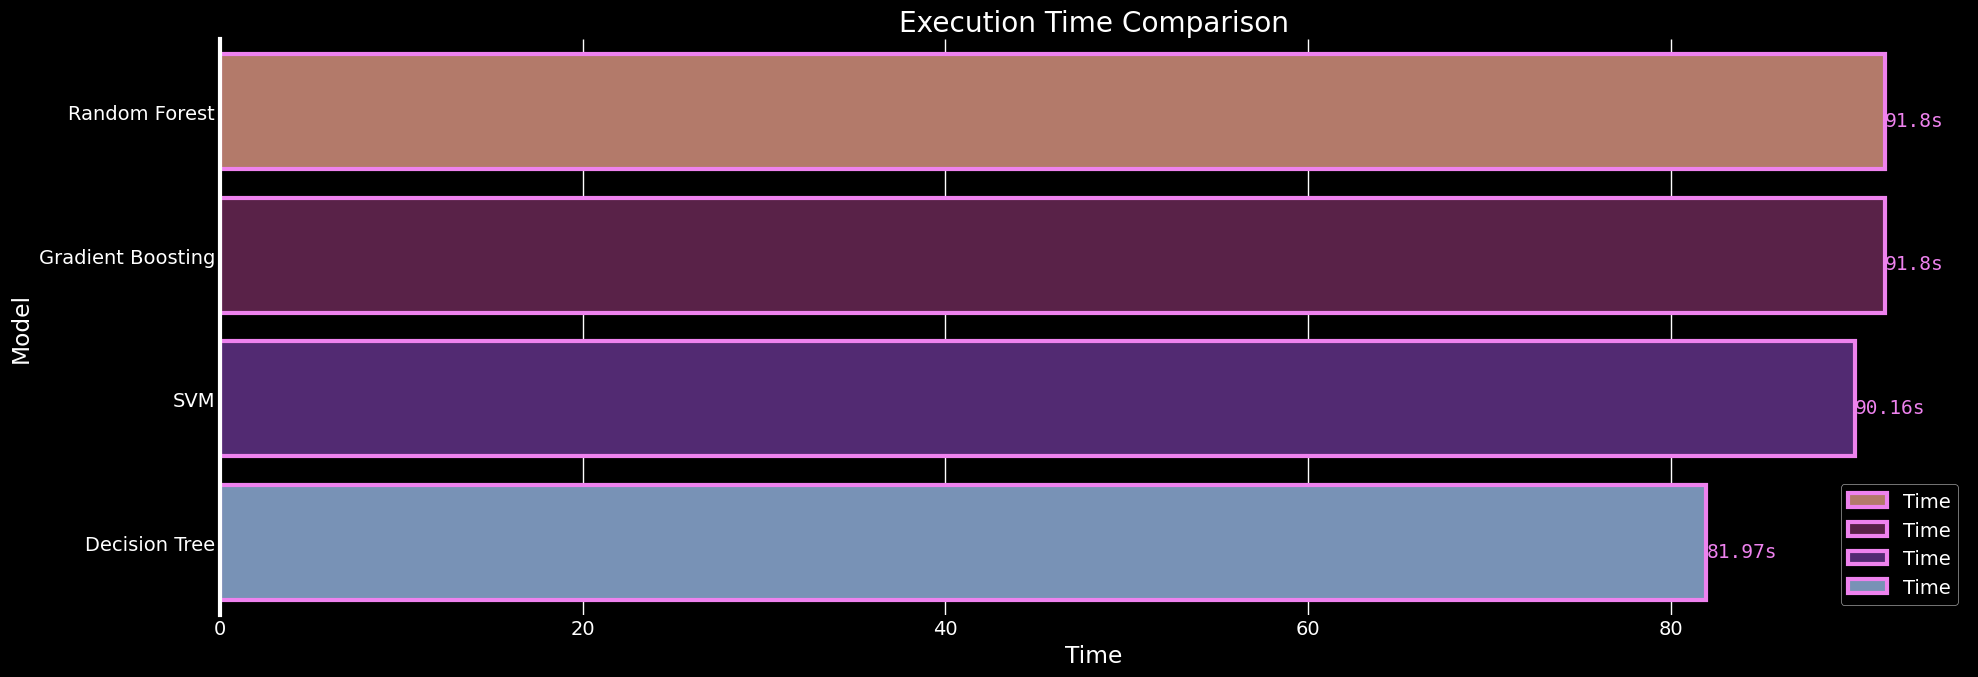

In [34]:
exe_time={"Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
            "SVM": model_svm_accuracy,
            "Gradient Boosting": model_GB_accuracy,}

time_list=exe_time.items()
k,v = zip(*time_list) 
temp1=pd.DataFrame(index=k,data=v,columns=["Time"])
temp1.sort_values(by=["Time"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ET=sns.barplot(y=temp1.index,x=temp1["Time"],label="Time",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Model")
plt.title("Execution Time Comparison")
ET.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ET.spines[w].set_visible(False)

#Write text on barplots
k=0
for ET in ET.patches:
    width = ET.get_width()
    plt.text(width+0.01, (ET.get_y() + ET.get_height()-0.3),s="{}s".format(round((temp1["Time"][k]),3)),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()